# Лабораторная работа № 2  
### Боровских Вадим, 932003
## Классификатор типа ландшафта в природном парке 

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Предварительная обработка набора данных
### Классификация пикселей по 7 типам лесного покрова на основе атрибутов: высота, наклон, тип почвы и т. д.

In [2]:
data = pd.read_csv("covtype.data", header=None, index_col=0)
data

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
0,,,,,,,,,,,,,,,,,,,,,
2596,51,3,258,0,510,221,232,148,6279,1,...,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,...,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,...,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,...,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,153,20,85,17,108,240,237,118,837,0,...,0,0,0,0,0,0,0,0,0,3
2391,152,19,67,12,95,240,237,119,845,0,...,0,0,0,0,0,0,0,0,0,3
2386,159,17,60,7,90,236,241,130,854,0,...,0,0,0,0,0,0,0,0,0,3


In [3]:
# Сбрасываем индекс
data=data.reset_index() 
#Переименнуем часть столбцов, которые будем использовать
data = data.rename(columns = {
                         0 : 'Elevation',
                         1 : 'Aspect',
                         2 : 'Slope',
                         3 : 'Horizontal_Distance_To_Hydrology',
                         4 : 'Vertical_Distance_To_Hydrology',
                         5 : 'Horizontal_Distance_To_Roadways',
                         6 : 'Hillshade_9am',
                         7 : 'Hillshade_Noon',
                         8 : 'Hillshade_3pm',
                         9:  'Horizontal_Distance_To_Fire_Points',
                         10: 'Wilderness_Area',
                         54 : 'Cover_Type'})



In [4]:
#Выводим первые и последнии 5 записей
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,45,46,47,48,49,50,51,52,53,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [5]:
#Описание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area                     581012 non-null  int64
 11  11                                  581012 non-null 

Сведения о датафрейме: названия столбцов, количество ненулевых значений, тип данных и использование памяти. В данном датасете все столбцы числового типа данных(int), а также ни в одном их них нет нулевых значений

In [6]:
# Подсчёт количества значений
data['Horizontal_Distance_To_Hydrology'].value_counts()

30      34139
0       24603
150     20785
60      19189
67      15223
        ...  
1397        1
1370        1
1355        1
1356        1
1312        1
Name: Horizontal_Distance_To_Hydrology, Length: 551, dtype: int64

In [7]:
#Вывод статистических сведений о датафрейме
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,45,46,47,48,49,50,51,52,53,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
#Выводим названия столбцов
data.columns


Index([                         'Elevation',
                                   'Aspect',
                                    'Slope',
         'Horizontal_Distance_To_Hydrology',
           'Vertical_Distance_To_Hydrology',
          'Horizontal_Distance_To_Roadways',
                            'Hillshade_9am',
                           'Hillshade_Noon',
                            'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points',
                          'Wilderness_Area',
                                         11,
                                         12,
                                         13,
                                         14,
                                         15,
                                         16,
                                         17,
                                         18,
                                         19,
                                         20,
                                         21,
          

#  Построить классифицирующие модели с использованием алгоритмов RandomForest, DecisionTree, LogisticRegression. 

In [10]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data[['Elevation','Aspect', 'Slope','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am']]
y = data['Cover_Type']

In [11]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Построение модели RandomForest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled , y_train )

RandomForestClassifier()

In [15]:
# Построение модели DecisionTree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled , y_train )

DecisionTreeClassifier()

In [14]:
# Построение и обучение модели
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [18]:
# Оценка модели
accuracy = lr_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.676058277325026


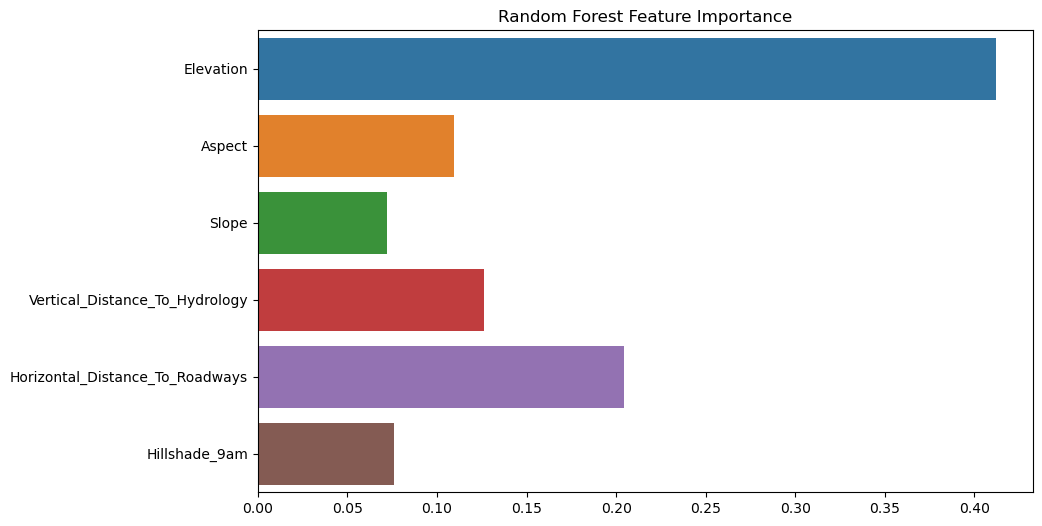

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title('Random Forest Feature Importance')
plt.show()


По данному графику можно понять, какие признаки (features) вносят наибольший вклад в модель RandomForest. Каждый столбец на графике представляет важность определенного признака для модели.Столбец "Evelation" имеет наибльший вес для нашей модели RandomForest.

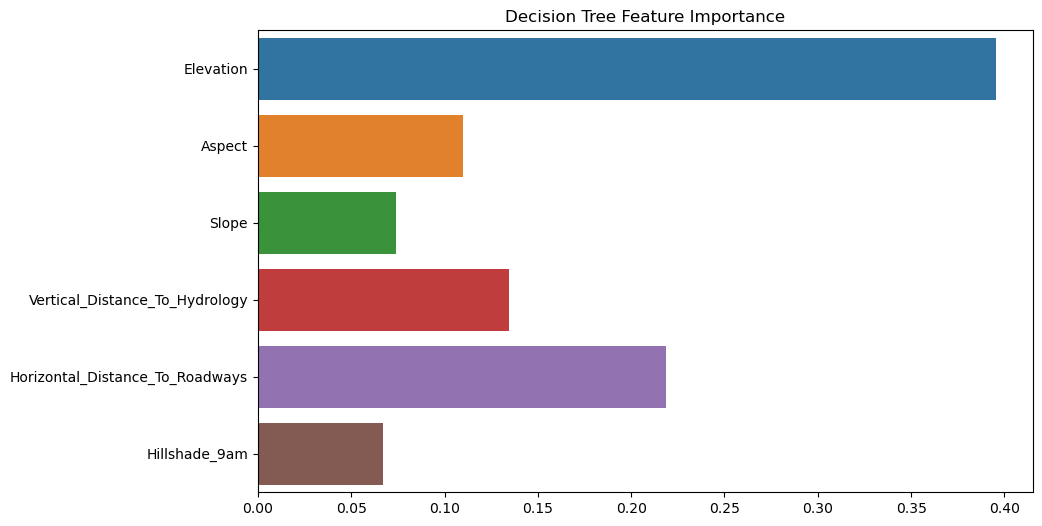

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dt_model.feature_importances_, y=X.columns)
plt.title('Decision Tree Feature Importance')
plt.show()

Данный график показывает, какие признаки (features) вносят наибольший вклад в модель DecisionTree. Каждый столбец на графике представляет важность определенного признака для модели. Столбец "Evelation" имеет наибольшую ценность для  модели RandomForest.

In [21]:
rf_importances = rf_model.feature_importances_
dt_importances = dt_model.feature_importances_
lr_importances = lr_model.coef_[0]
# Создание DataFrame с значениями важности признаков
importance_df = pd.DataFrame({'Features': X.columns, 'RandomForest': rf_importances, 'DecisionTree': dt_importances, 'LogisticRegression': lr_importances})

# Визуализация значений важности признаков


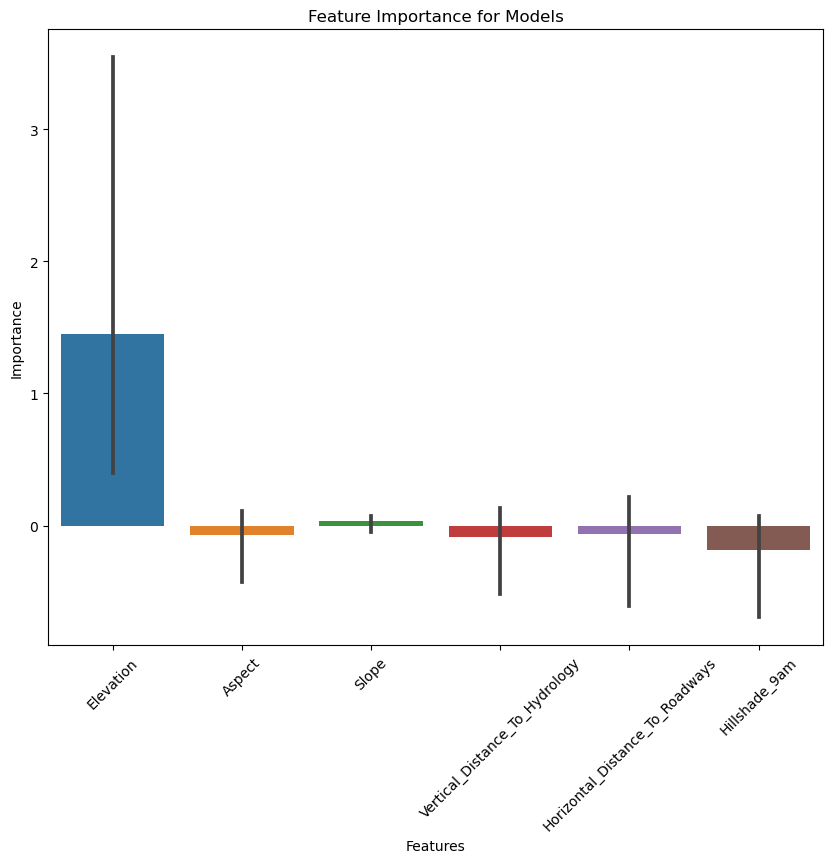

In [22]:
# Визуализация значений важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='Features', y='Importance', data=importance_df.melt(id_vars='Features', var_name='Model', value_name='Importance'))
plt.title('Feature Importance for Models')
plt.xticks(rotation=45)

plt.show()

Путем сравнения столбцов для различных моделей можно определить, какие признаки оказывают наибольшее влияние на все модели. По графику видно, что "Evelation" снова является самым весомым для всех моделей

In [23]:
from sklearn.preprocessing import label_binarize

models = [rf_model, dt_model, lr_model]
for model in models:
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    y_test_binarized = label_binarize(y_test, classes=model.classes_)
    y_pred_binarized = label_binarize(y_pred, classes=model.classes_)
    
    # ROC-кривая
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_binarized.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, ROC AUC (micro): {roc_auc['micro']}")

Model: RandomForestClassifier, Accuracy: 0.8881526294501864, Precision: 0.8882442052895241, Recall: 0.8881526294501864, ROC AUC (micro): 0.9347557005126088
Model: DecisionTreeClassifier, Accuracy: 0.8453740436993882, Precision: 0.845359304086202, Recall: 0.8453740436993882, ROC AUC (micro): 0.9098015254913098


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: LogisticRegression, Accuracy: 0.676058277325026, Precision: 0.6515461258947054, Recall: 0.676058277325026, ROC AUC (micro): 0.8110339951062651


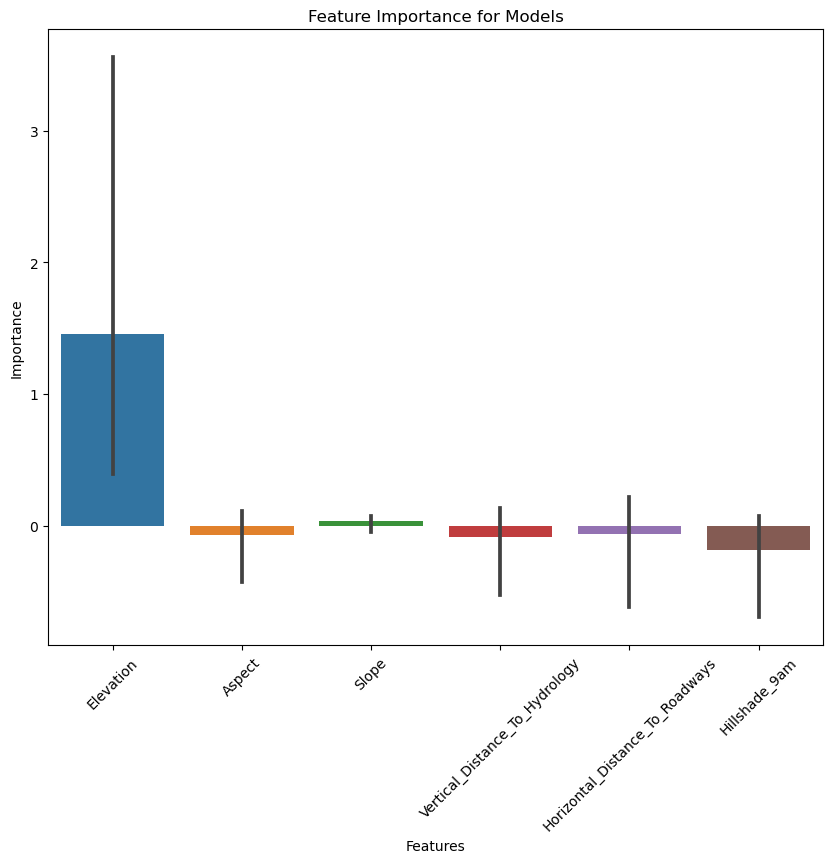

In [159]:
# Визуализация значений важности признаков
rf_importances = rf_model.feature_importances_
dt_importances = dt_model.feature_importances_
lr_importances = lr_model.coef_[0]
importance_df = pd.DataFrame({'Features': X.columns, 'RandomForest': rf_importances, 'DecisionTree': dt_importances, 'LogisticRegression': lr_importances})
plt.figure(figsize=(10, 8))
sns.barplot(x='Features', y='Importance', data=importance_df.melt(id_vars='Features', var_name='Model', value_name='Importance'))
plt.title('Feature Importance for Models')
plt.xticks(rotation=45)
plt.show()

Вывод: RandomForestClassifier и DecisionTreeClassifier демонстрируют более высокое качество предсказаний по сравнению с моделью LogisticRegression 

 * RandomForestClassifier демонстрирует самую высокую точность (Accuracy: 0.8875), что указывает на общую способность модели правильно классифицировать данные тестового набора.
 * DecisionTreeClassifier также обладает хорошей точностью (Accuracy: 0.8448), что свидетельствует о ее способности правильно классифицировать данные, но немного ниже по сравнению с RandomForestClassifier.
 * LogisticRegression, тем не менее, показывает низкую точность (Accuracy: 0.6761), что указывает на ее менее эффективное предсказательное поведение по сравнению с двумя другими моделями.


    Значения для RandomForestClassifier и DecisionTreeClassifier лежат в диапазоне 0.90-0.93, что указывает на их хорошую способность различать между классами. В то время как у модели LogisticRegression значение ROC AUC составляет 0.81, что указывает на более слабую различимость классов.

    

D:\Anaconda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


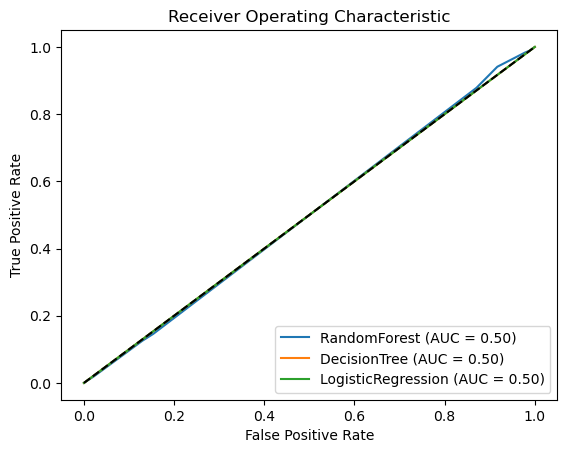

In [160]:
models = [rf_model, dt_model, lr_model]
model_names = ['RandomForest', 'DecisionTree', 'LogisticRegression']

for model, model_name in zip(models, model_names):
    y_pred_binarized = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, 1], y_pred_binarized[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Случайная модель
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Значения ROC-кривой, когда все три модели показывают AUC близкое к 0.50, это свидетельствовует о том, что они не обладают значительным преимуществом при различении классов по сравнению с случайным угадыванием.

In [161]:
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [162]:
# Подбор гиперпараметров для модели RandomForest
rf_param_grid = {'n_estimators': [10, 20, 30], 'max_depth': [10, 20, 30]}
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

In [163]:
# Подбор гиперпараметров для модели DecisionTree
dt_param_grid = {'max_depth': [10, 20, 30]}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
dt_best_model = dt_grid_search.best_estimator_

In [164]:
# Подбор гиперпараметров для модели LogisticRegression
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)
lr_best_model = lr_grid_search.best_estimator_

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [165]:
from sklearn.preprocessing import label_binarize

models = [rf_best_model, dt_best_model, lr_best_model]
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    y_test_binarized = label_binarize(y_test, classes=model.classes_)
    y_pred_binarized = label_binarize(y_pred, classes=model.classes_)
    
    # ROC-кривая
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_binarized.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, ROC AUC (micro): {roc_auc['micro']}")

Model: RandomForestClassifier, Accuracy: 0.8808974685548664, Precision: 0.8808522531632805, Recall: 0.8808974685548664, ROC AUC (micro): 0.930523523323672
Model: DecisionTreeClassifier, Accuracy: 0.8427226976379145, Precision: 0.8427045659135186, Recall: 0.8427226976379145, ROC AUC (micro): 0.9082549069554502


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: LogisticRegression, Accuracy: 0.5684977246597317, Precision: 0.5222012547615523, Recall: 0.5684977246597317, ROC AUC (micro): 0.7482903393848435


Вывод:
* Модель RandomForestClassifier демонстрирует высокую точность, полноту и AUC-ROC, что указывает на ее сильное предсказательное поведение.
* Модель DecisionTreeClassifier также обладает хорошими характеристиками точности, полноты и AUC-ROC, что говорит о ее способности правильно классифицировать данные.
* Модель LogisticRegression показывает более низкие показатели точности, полноты и AUC-ROC, указывающие на то, что она менее эффективна в предсказании классов по сравнению с двумя другими моделями.
    Исходя из полученныз результатов, лучше использовать RandomForestClassifier/DecisionTreeClassifier для данного набора данных, в то время как LogisticRegression потребует дополнительной настройки для улучшения производительности.

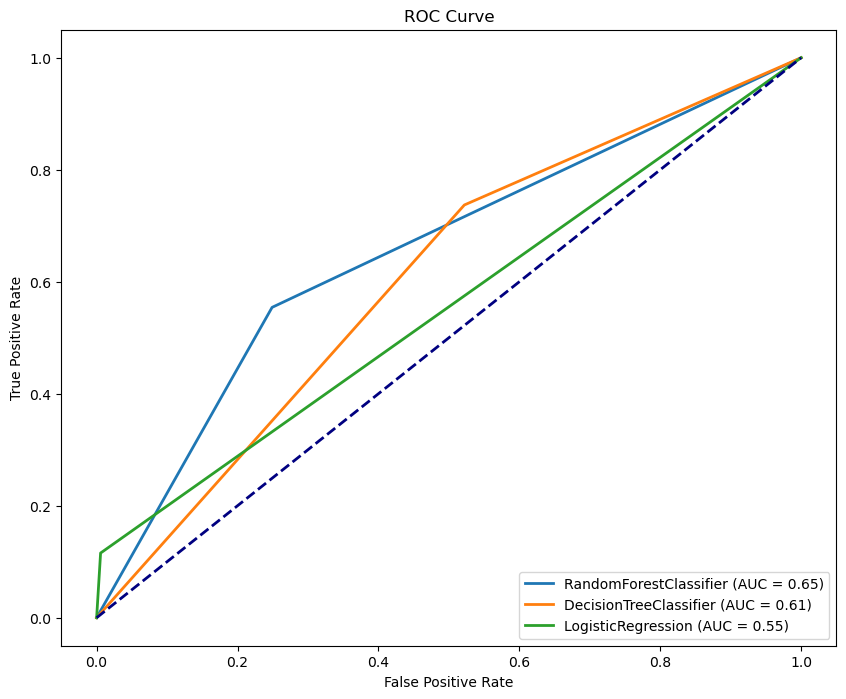

In [166]:
# График ROC-кривой
plt.figure(figsize=(10, 8))
for i in range(len(models)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{models[i].__class__.__name__} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

* Модель RandomForestClassifier демонстрирует среднюю прогностическую способность (AUC=0.65), что указывает на умеренную способность различать между классами.
* Модель DecisionTreeClassifier также показывает умеренную прогностическую способность (AUC=0.61), что свидетельствует о сходной способности различать между классами.
* Модель LogisticRegression обладает наименьшей прогностической способностью (AUC=0.55), указывающей на ограниченную способность различать между классами.
  График ROC-кривой позволяет визуально сравнить производительность моделей по различению классов по осям False Positive Rate и True Positive Rate , а величина AUC оценивает качество различения между классами: чем выше значение AUC, тем лучше способность модели различать классы.

### Вывод:
Моделей без подбора гиперпараметров, такие как RandomForestClassifier и DecisionTreeClassifier показывают высокую точность, полноту и ROC AUC, что говорит об их хорошей способности классифицировать данные.

В случае моделей с подбором гиперпараметров, все они показывают более высокое значения точности, полноты и ROC AUC по сравнению с моделями без подбора гиперпараметров. RandomForestClassifier и DecisionTreeClassifier  имеет достаточно высокие значения, что может указывать на то, что он остается наиболее предпочитаемой моделью из представленных.